fit f(x)=2x+1

In [6]:
#parameteres
m = 2 #inclinaz
q = 1 #intercetta

genero dati input, rumorosi:

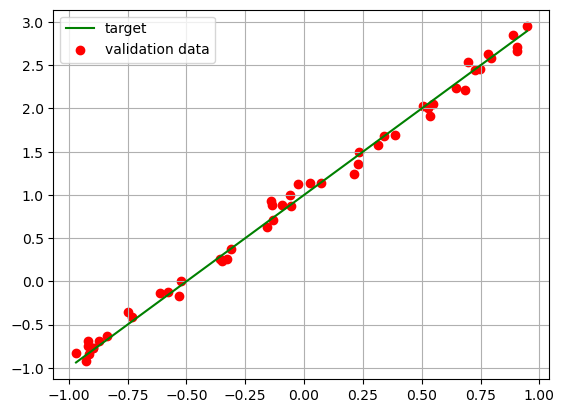

In [13]:
import numpy as np

# generate training inputs
np.random.seed(1)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + q # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(m * x_train + q, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + q, sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target', color='g')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()


modello a singolo neurone (sequenziale)

In [16]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" #per debuggare e avere output pulito no spam

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

ho creato il modello, lo alleno con set di coppie di dati del tipo (x_train, y_train)
uso ottimizzatore SGD per minimizzare la funzione loss MSE

In [20]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9654 - mse: 2.9654 - val_loss: 1.9777 - val_mse: 1.9777
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 1.6415 - mse: 1.6415 - val_loss: 1.1951 - val_mse: 1.1951
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 1.0044 - mse: 1.0044 - val_loss: 0.7540 - val_mse: 0.7540
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.6772 - mse: 0.6772 - val_loss: 0.4828 - val_mse: 0.4828
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.3977 - mse: 0.3977 - val_loss: 0.3106 - val_mse: 0.3106
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.2887 - mse: 0.2887 - val_loss: 0.2014 - val_mse: 0.2014
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.1829 - mse: 0.1829 - val_loss: 0.1316 - val_mse: 0.1316
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.1188 - mse: 0.1188 - val_loss: 0.0858 - val_mse: 0.0858
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss

verifico i pesi del mio modello per confrontarli con i valori teorici

In [23]:
# return weights and biases
model.get_weights()

[array([[1.9846846]], dtype=float32), array([1.0032742], dtype=float32)]

testo il modello sul validation set

In [30]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
#print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 - mse: 0.0080 

Test loss: 0.007882025092840195


In [33]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1118e-04 - mse: 1.1118e-04 

Test loss: 0.00010235039371764287


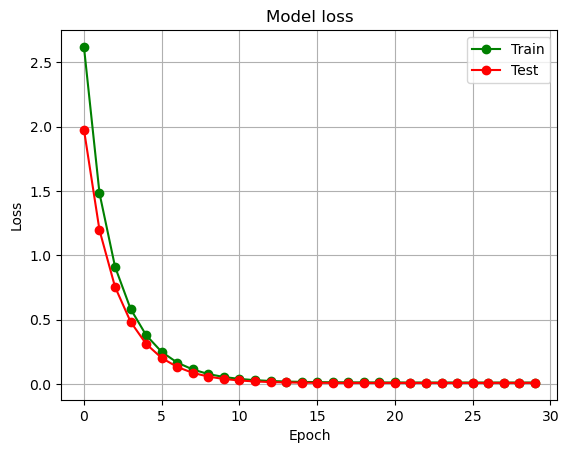

In [35]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid('true')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


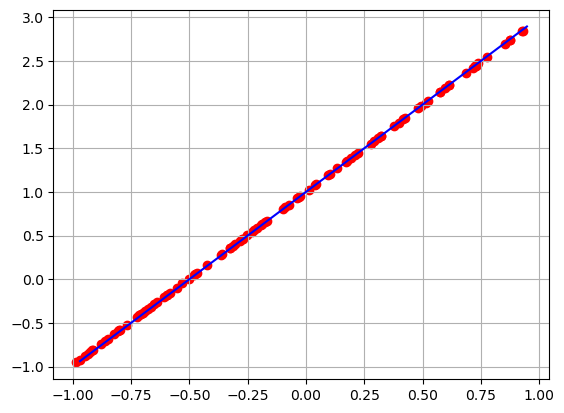

In [37]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label="Model prediction")
plt.plot(x_valid, y_target, color='b',label="Target function")
plt.grid(True)
plt.show()

ho plottato x generate a caso e y_pred predette dal modello

### Exercise 11.2


partendo ed estendendo il modello appena descritto cerchiamo di ottenere un fit del polinomio (ordine 3): $$
f(x)=4-3x-2x^2+3x^3
$$
nel range $x \in [-1,1]$.

creo nuovi dataset di training e test, più grandi

In [50]:
import numpy as np

# generate training inputs
np.random.seed(1)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = 4 - 3 *  x_valid - 2 *  x_valid *  x_valid + 3 *  x_valid *  x_valid * x_valid  # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(4 - 3 * x_train - 2 * x_train * x_train + 3 * x_train * x_train *x_train  , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4 - 3 * x_valid - 2 * x_valid * x_valid + 3 * x_valid * x_valid* x_valid , sigma)


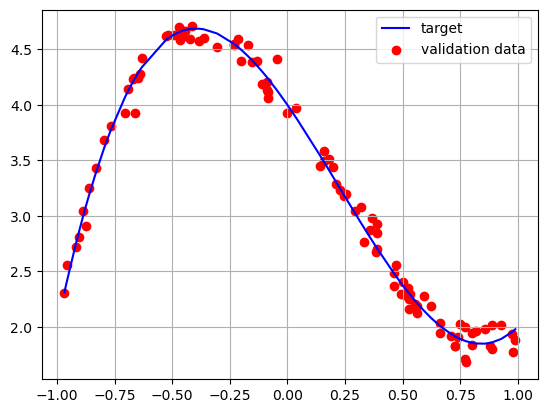

In [52]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target', color='b')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

creo il modello:

In [57]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

fitto il mio modello in 50 epoche

In [60]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.5955 - mse: 1.5955 - val_loss: 0.1044 - val_mse: 0.1044
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - loss: 0.1044 - mse: 0.1044 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 

In [64]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
#print('Test accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0099 - mse: 0.0099

Test loss: 0.010013943538069725


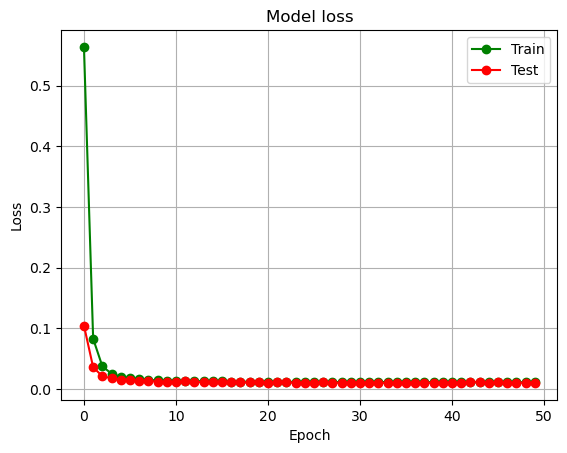

In [66]:
# Plot training & validation loss values
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid('true')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


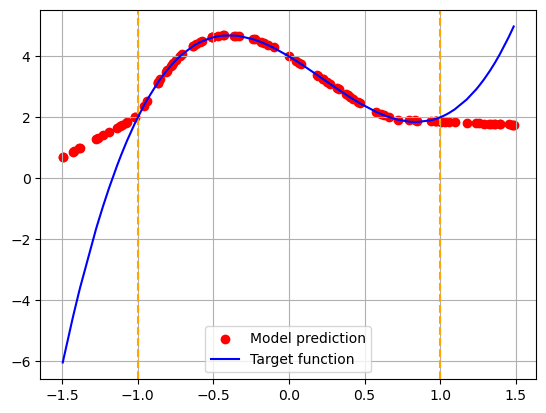

In [68]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label= "Model prediction")
plt.axvline(1., color = 'orange', linestyle = '--')
plt.axvline(-1., color = 'orange', linestyle = '--')
x_predicted.sort()
y_target_ext = 4 - 3 *  x_predicted - 2 *  x_predicted *  x_predicted + 3 *  x_predicted *  x_predicted * x_predicted 
plt.plot(x_predicted, y_target_ext, color='b',label="Target function")
plt.grid(True)
plt.legend()
plt.show()


### Exercise 11.3


estendiamo ancora il modello per provare a fittare una funzione trigonometrica:
$f(x,y) = \sin(x^2+y^2)$ nel range $x \in [-3/2,3/2]$, $y \in [-3/2,3/2]$.

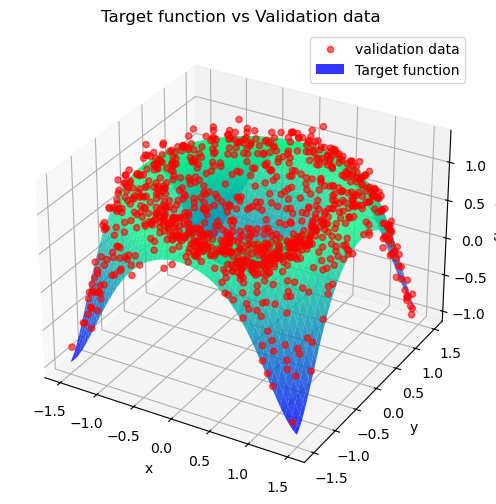

In [76]:

# generate training inputs
np.random.seed(1)
x_train = np.random.uniform(low=-3./2, high=3./2, size=(10000, 2))
x_valid = np.random.uniform(low=-3./2, high=3./2, size=(1000, 2))
#x_valid.sort
y_target = np.sin(x_valid[:, 0]**2 + x_valid[:, 1]**2)

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(np.sin(x_train[:, 0]**2 + x_train[:, 1]**2), scale=sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x_valid[:, 0]**2 + x_valid[:, 1]**2), scale=sigma)

from mpl_toolkits.mplot3d import Axes3D

# Coordinate
x = x_valid[:, 0]
y = x_valid[:, 1]
z_target = y_target
z_valid = y_valid

# Plot 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(x, y, z_target,color="blue", label='target', alpha=0.6)
ax.scatter(x, y, z_valid, color='red', label='validation data', alpha=0.6, s=20)

# 1. Crea griglia regolare
x_grid = np.linspace(min(x), max(x), 100)
y_grid = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = np.sin(X**2 + Y**2)
surf = ax.plot_surface(X, Y, Z, cmap='winter', edgecolor='none', alpha=0.8, label="Target function")
ax.legend(['Target surface'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Target function vs Validation data')
ax.legend()
plt.show()



In [78]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model1 = tf.keras.Sequential()
model1.add(Dense(32, input_shape=(2,), activation='relu'))
model1.add(Dense(16,  activation='relu'))
model1.add(Dense(1,))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='adam', loss='mse', metrics=['mse']) 

model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
history = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.1906 - mse: 0.1906 - val_loss: 0.1180 - val_mse: 0.1180
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 0.1181 - mse: 0.1181 - val_loss: 0.0928 - val_mse: 0.0928
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.0891 - mse: 0.0891 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 

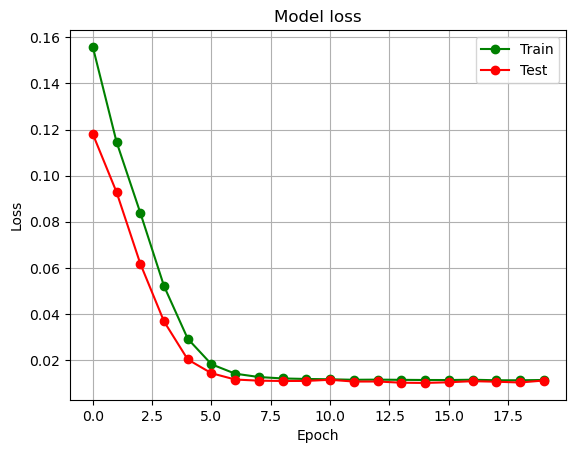

In [82]:
# Plot training & validation loss values
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid('true')
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step


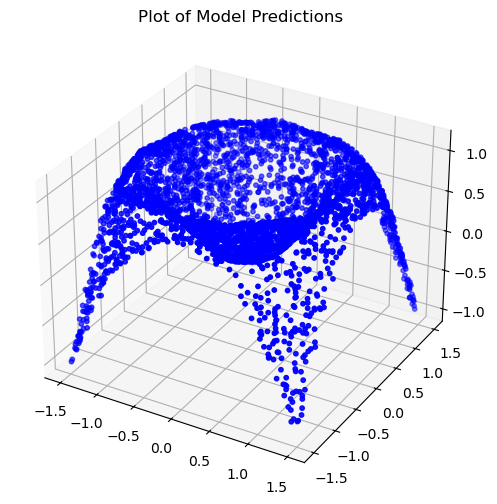

In [84]:
x_predicted = np.random.uniform(-1.5, 1.5,size=(4000, 2))
y_predicted = model1.predict(x_predicted)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_predicted[:, 0], x_predicted[:, 1], y_predicted.flatten(), c='blue', s=10)
plt.title("Plot of Model Predictions")

plt.grid(True)
plt.show()